In [1]:
# MRI 뇌 사진을 보고 치매 환자인지, 일반인인지 예측하기
# 각 사진마다 치매 혹은 일반인으로 클래스가 주어지므로 지도 학습
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

# ImageDataGenerator() : 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함시켜 데이터의 수 늘림
train_datagen = ImageDataGenerator(rescale=1./255,         #이미지의 크기를 변경(0~255 사이의 값을 0~1의 값으로 변환)
                                  horizontal_flip=True,    #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,   #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,  #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') #이미지를 축소,회전,이동할 때 생기는 빈 공간 채울 방법 결정(naerest는 가장 비슷한 색)  

# flow_from_directory() : 폴더에 저장된 데이터를 불러옴
train_generator = train_datagen.flow_from_directory(
       './train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')  # 치매/정상 2진 분류이므로 바이너리 모드로 실행

#테스트 셋은 과적합의 위험을 줄이기 위해 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


Epoch 1/20
100/100 [==============================] - 63s 632ms/step - loss: 0.6968 - accuracy: 0.4940 - val_loss: 0.6829 - val_accuracy: 0.6600
Epoch 2/20
100/100 [==============================] - 63s 625ms/step - loss: 0.6738 - accuracy: 0.6020 - val_loss: 0.6291 - val_accuracy: 0.5600
Epoch 3/20
100/100 [==============================] - 63s 632ms/step - loss: 0.6268 - accuracy: 0.6680 - val_loss: 0.5028 - val_accuracy: 0.8200
Epoch 4/20
100/100 [==============================] - 60s 601ms/step - loss: 0.4695 - accuracy: 0.7920 - val_loss: 0.3362 - val_accuracy: 0.9000
Epoch 5/20
100/100 [==============================] - 61s 613ms/step - loss: 0.3279 - accuracy: 0.8700 - val_loss: 0.2314 - val_accuracy: 0.9400
Epoch 6/20
100/100 [==============================] - 58s 580ms/step - loss: 0.2682 - accuracy: 0.8980 - val_loss: 0.2067 - val_accuracy: 0.9600
Epoch 7/20
100/100 [==============================] - 59s 591ms/step - loss: 0.1815 - accuracy: 0.9380 - val_loss: 0.1155 - val_ac

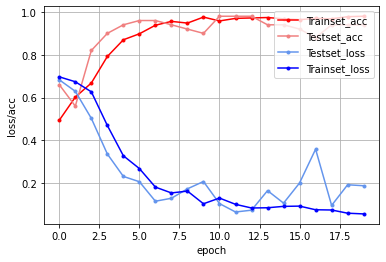

In [2]:

# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
# 실행 함수로 fit()이 아닌 fit_generator() 사용!
history = model.fit_generator(
       train_generator,  # 이를 학습 모델로 사용
       steps_per_epoch=100,  # 이미지 생성기에서 몇 개의 샘플을 뽑을지 결정
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()


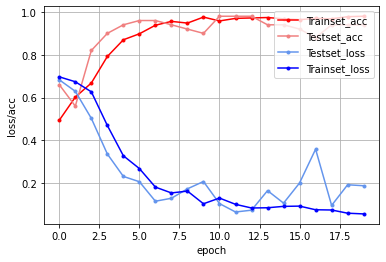

In [3]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()